<a href="https://colab.research.google.com/github/kaitouz/OpenEdu/blob/main/Machine%20Learning%20%26%20Data%20Analysis/task10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip -o -q train_task.zip
!unzip -o -q test_task.zip

In [2]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python
!pip install --upgrade scikit-learn==0.23.0

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

In [13]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [23]:
imagePaths = sorted(list(paths.list_images('train')))
trainData = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    trainData.append(hist)
    labels.append(label)
  
Y = [1 if x == 'cat' else 0 for x in labels]

In [24]:
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state = 225, C = 1.06)
svm.fit(trainData, Y)

LinearSVC(C=1.06, random_state=225)

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=20, #максимальное число листьев
                              random_state=225)
bagging = BaggingClassifier(tree, #базовый алгоритм
                            n_estimators=24, #количество деревьев
                            random_state=225)
bagging.fit(trainData, Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_leaf_nodes=20,
                                                        min_samples_leaf=10,
                                                        random_state=225),
                  n_estimators=24, random_state=225)

In [20]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=24, #количество деревьев
                                criterion='entropy', #критерий разделения
                                min_samples_leaf=10, #минимальное число объектов в листе
                                max_leaf_nodes=20, #максимальное число листьев
                                random_state=225)
forest.fit(trainData, Y)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=20,
                       min_samples_leaf=10, n_estimators=24, random_state=225)

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', random_state=225)

In [27]:
from sklearn.ensemble import StackingClassifier

base_estimators = [('SVM', svm), ('Bagging DT', bagging), ('DecisionForest', forest)]
sclf = StackingClassifier(estimators=base_estimators, final_estimator=lr, cv=2)
sclf.fit(trainData, Y)

StackingClassifier(cv=2,
                   estimators=[('SVM', LinearSVC(C=1.06, random_state=225)),
                               ('Bagging DT',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                        max_leaf_nodes=20,
                                                                                        min_samples_leaf=10,
                                                                                        random_state=225),
                                                  n_estimators=24,
                                                  random_state=225)),
                               ('DecisionForest',
                                RandomForestClassifier(criterion='entropy',
                                                       max_leaf_nodes=20,
                                                       min_samples_leaf=10,
       

In [28]:
sclf.score(trainData, Y)

0.855

In [36]:
def Predict_filename(file_name):
  singleImage = cv2.imread("test/" + file_name)
  prediction = sclf.predict(extract_histogram(singleImage).reshape(1, -1))
  display(Image(filename="test/" + file_name))
  print(f"Ans = {prediction}")
  print(f"Ans = {sclf.predict_proba(extract_histogram(singleImage).reshape(1, -1))}")

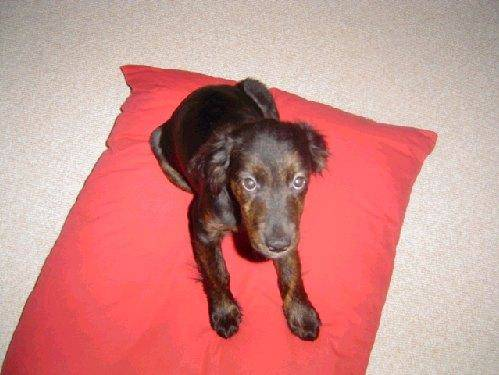

Ans = [1]
Ans = [[0.40591734 0.59408266]]


In [41]:
Predict_filename("dog.1042.jpg")